<a href="https://colab.research.google.com/github/Cimbydium/Data_Communications_and_Computer_Networks_Project/blob/main/House_Pricing_Predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving California_Houses.csv to California_Houses (1).csv
Dataset shape: (20640, 14)
Number of instances: 20640
Number of features: 14
Available features: ['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
Handling missing values
Original dataset shape: (20640, 14)
Cleaned dataset shape: (20640, 14)
Performing Exploratory Data Analysis


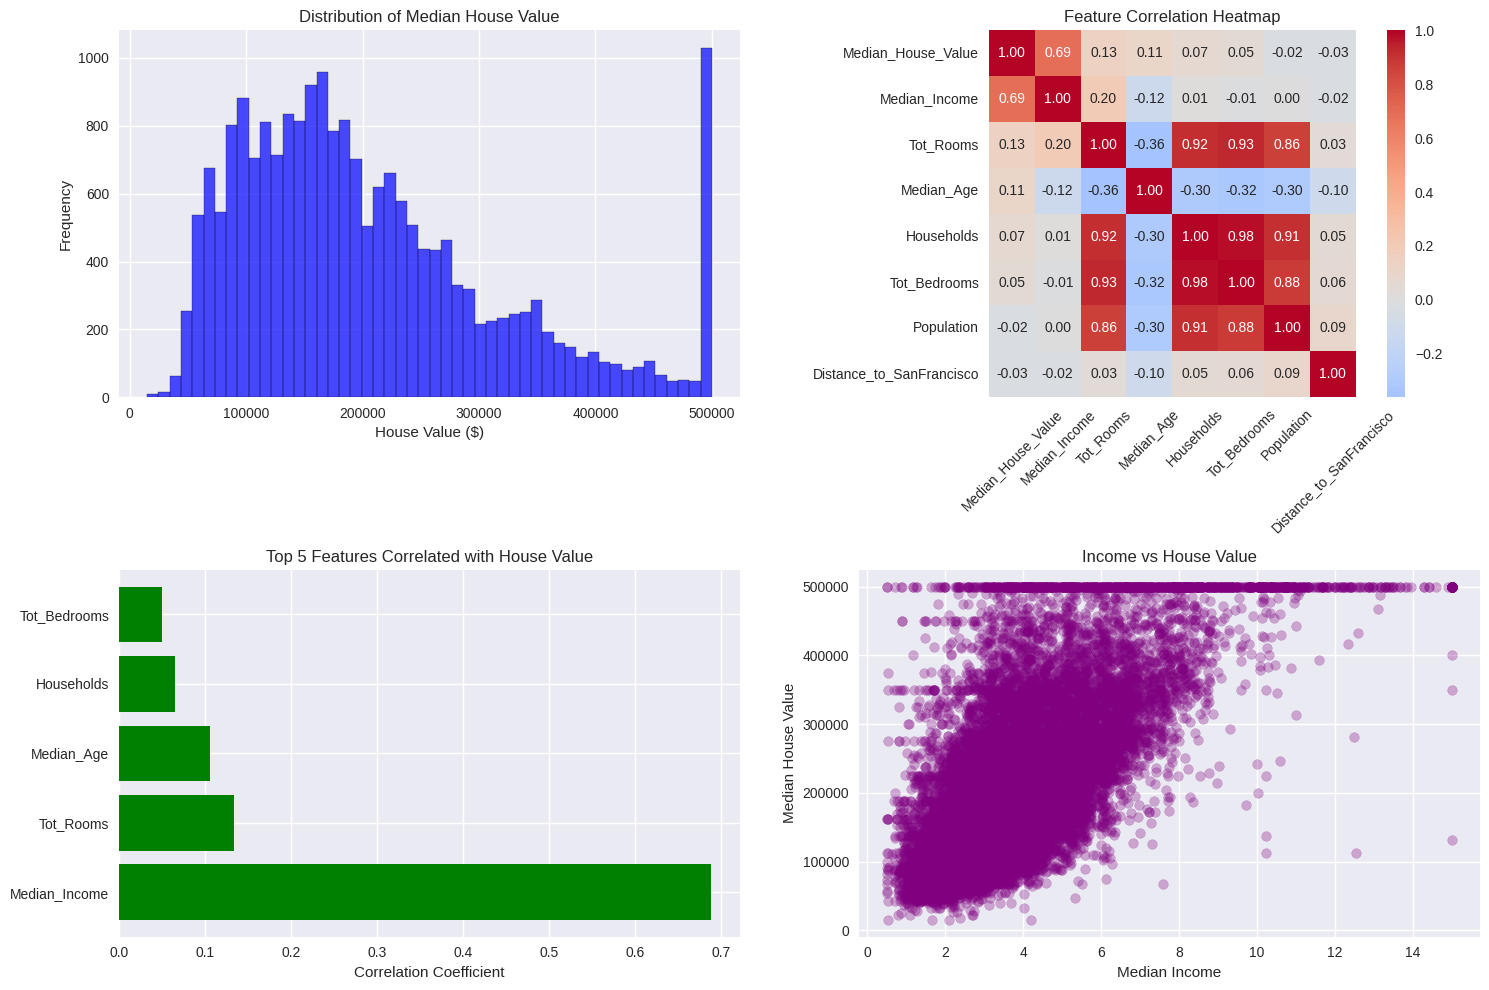


CORRELATION ANALYSIS RESULTS

 Highest positive correlations with Median_House_Value:
  Median_Income: 0.688
  Tot_Rooms: 0.134
  Median_Age: 0.106
  Households: 0.066
  Tot_Bedrooms: 0.051

 Highest negative correlations with Median_House_Value:
  Distance_to_coast: -0.469
  Latitude: -0.144
  Distance_to_LA: -0.131
Preparing data for modeling
Training set shape: (16512, 13)
Testing set shape: (4128, 13)
Training multiple regression models 

Training Linear Regression
Linear Regression - Test R2: 0.6330

Training Decision Tree
Decision Tree - Test R2: 0.7284

Training Support Vector Regressor
Support Vector Regressor - Test R2: 0.5909

Training XGBoost
XGBoost - Test R2: 0.8571

MODEL EVALUATION

 Model Performance Comparison:


,Model,R2 Score,MAE,RMSE
3,XGBoost,0.8571,27341.18,43275.07
1,Decision Tree,0.7284,39198.24,59653.42
0,Linear Regression,0.6330,50404.86,69353.01
2,Support Vector Regressor,0.5909,50909.19,73219.63


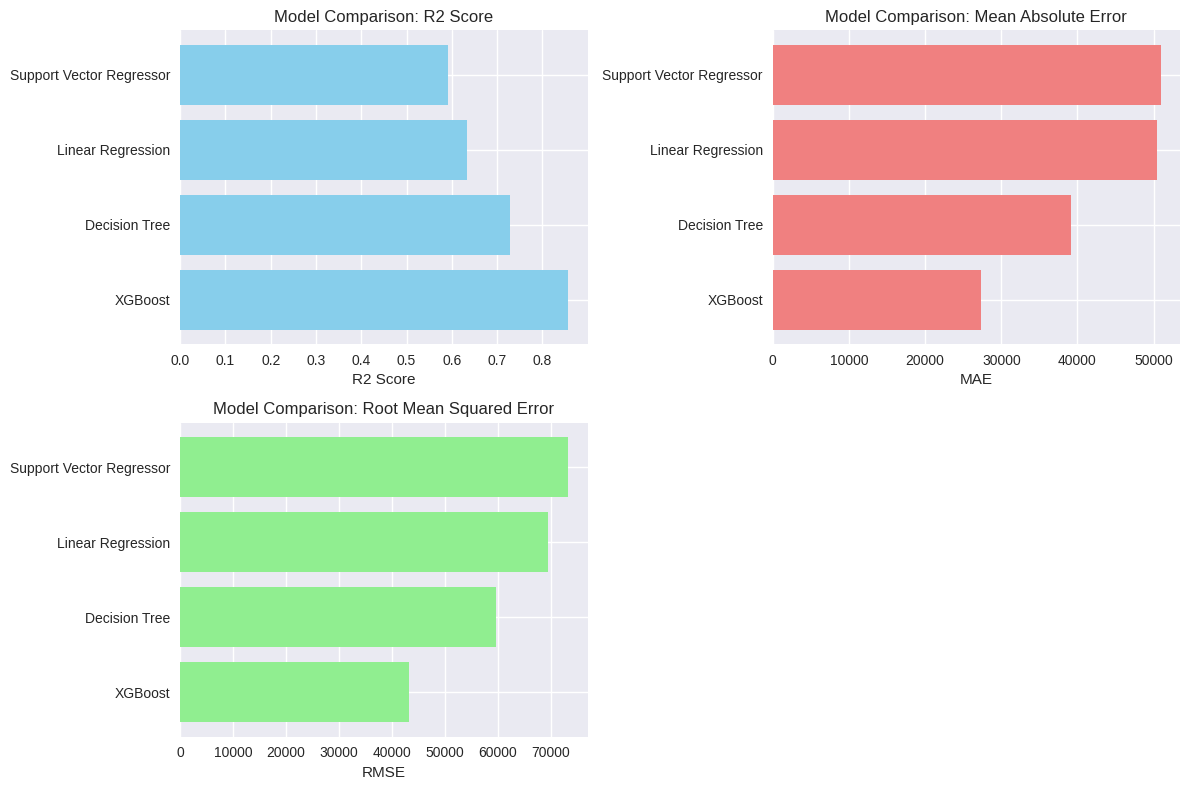

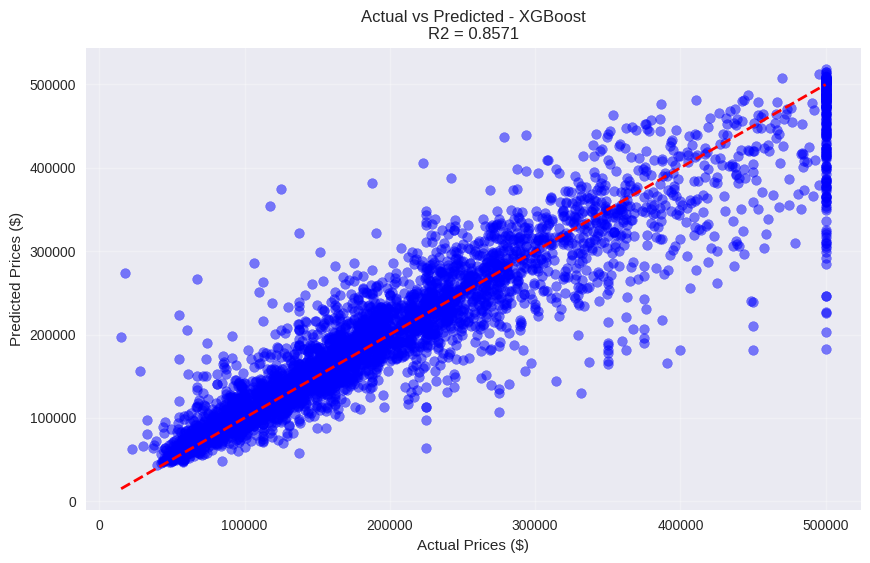

FINAL PROJECT REPORT

PROJECT OVERVIEW
 Replication: Linear Regression, Decision Tree, SVR
 Innovation: XGBoost
Dataset: 20640 instances, 14 features
 Target Variable: Median House Value

BEST PERFORMING MODEL: XGBoost
 R2 Score: 0.8571
 Mean Absolute Error: $27,341.18
 Root Mean Squared Error: $43,275.07
 Strongest positive correlation: Median_Income (0.688)
 Strongest negative correlation: Distance_to_coast (-0.469)
• Average R2 - Replication: 0.6508
• Average R2 - Innovation: 0.8571
• Performance improvement: +31.7%


In [ ]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Upload and load the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
dataset = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"Dataset shape: {dataset.shape}")
print(f"Number of instances: {dataset.shape[0]}")
print(f"Number of features: {dataset.shape[1]}")
print("Available features:", list(dataset.columns))


# Data preprocessing function
def preprocess_data(df):
    df_clean = df.copy()

# Handle missing values
    print("Handling missing values")
    for column in df_clean.columns:
        if df_clean[column].isnull().sum() > 0:
            if df_clean[column].dtype in ['float64', 'int64']:
                df_clean[column].fillna(df_clean[column].median(), inplace=True)
                print(f"Filled missing values in {column} with median")

# Remove duplicates
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    final_rows = len(df_clean)
    if initial_rows != final_rows:
        print(f"Removed {initial_rows - final_rows} duplicate rows")

    return df_clean

# Preprocess the dataset
dataset_clean = preprocess_data(dataset)
print(f"Original dataset shape: {dataset.shape}")
print(f"Cleaned dataset shape: {dataset_clean.shape}")

# Exploratory Data Analysis
def perform_eda(df, target_column='Median_House_Value'):
    print("Performing Exploratory Data Analysis")

    # 1- Distribution of target variable
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.hist(df[target_column], bins=50, edgecolor='black', alpha=0.7, color='blue')
    plt.title('Distribution of Median House Value')
    plt.xlabel('House Value ($)')
    plt.ylabel('Frequency')

    # 2- Correlation heatmap
    plt.subplot(2, 2, 2)
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    target_correlations = correlation_matrix[target_column].sort_values(ascending=False)

    top_features = target_correlations.index[:8]
    sns.heatmap(correlation_matrix.loc[top_features, top_features],
                annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 3- Top correlations with target
    plt.subplot(2, 2, 3)
    top_correlations = target_correlations[1:6]
    colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
    plt.barh(range(len(top_correlations)), top_correlations.values, color=colors)
    plt.yticks(range(len(top_correlations)), top_correlations.index)
    plt.xlabel('Correlation Coefficient')
    plt.title('Top 5 Features Correlated with House Value')

      # 4- Median Income vs House Value
    plt.subplot(2, 2, 4)
    if 'Median_Income' in df.columns:
        plt.scatter(df['Median_Income'], df[target_column], alpha=0.3, color='purple')
        plt.xlabel('Median Income')
        plt.ylabel('Median House Value')
        plt.title('Income vs House Value')

    plt.tight_layout()
    plt.show()



    # Print correlation findings
    print("\n" + "="*50)
    print("CORRELATION ANALYSIS RESULTS")
    print("="*50)
    print(f"\n Highest positive correlations with {target_column}:")
    for i, (feature, corr) in enumerate(target_correlations.items()):
        if i == 0: continue
        if i > 5: break
        print(f"  {feature}: {corr:.3f}")

    print(f"\n Highest negative correlations with {target_column}:")
    negative_correlations = target_correlations[target_correlations < 0].sort_values()
    for i, (feature, corr) in enumerate(negative_correlations.items()):
        if i >= 3: break
        print(f"  {feature}: {corr:.3f}")

    return target_correlations

# Perform EDA
correlation_results = perform_eda(dataset_clean)

# Data preparation for modeling
def prepare_data_for_modeling(df, target_column='Median_House_Value', test_size=0.2, random_state=42):
    print("Preparing data for modeling")

# Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

# Select only numerical features
    numerical_features = X.select_dtypes(include=[np.number]).columns
    X = X[numerical_features]

# Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

# Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training set shape: {X_train_scaled.shape}")
    print(f"Testing set shape: {X_test_scaled.shape}")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

# Prepare the data
X_train, X_test, y_train, y_test, scaler, feature_names = prepare_data_for_modeling(dataset_clean)

# Model Implementation
class HousePricePredictor:
    def __init__(self):
        self.models = {}
        self.best_params = {}
        self.train_metrics = {}
        self.test_metrics = {}
        self.feature_importance = {}

    def train_models(self, X_train, X_test, y_train, y_test):
        print("Training multiple regression models ")

        # Replication models
        replication_models = {
            'Linear Regression': LinearRegression(),
            'Decision Tree': DecisionTreeRegressor(random_state=42),
            'Support Vector Regressor': SVR()
        }

        # Innovation model
        innovation_models = {
            'XGBoost': XGBRegressor(random_state=42, n_estimators=100)
        }

        # Combine all models
        all_models = {**replication_models, **innovation_models}

        param_grids = {
            'Decision Tree': {
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5]
            },
            'Support Vector Regressor': {
    'C': [1, 10, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
},
            'XGBoost': {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
        }

        # Train and evaluate each model
        for model_name, model in all_models.items():
            print(f"\nTraining {model_name}")

            try:
                if model_name in param_grids:
                    grid_search = GridSearchCV(
                        model, param_grids[model_name],
                        cv=3, scoring='r2', n_jobs=-1, verbose=0
                    )
                    grid_search.fit(X_train, y_train)
                    best_model = grid_search.best_estimator_
                    self.best_params[model_name] = grid_search.best_params_
                else:
                    best_model = model
                    best_model.fit(X_train, y_train)

                self.models[model_name] = best_model

                # Make predictions
                y_train_pred = best_model.predict(X_train)
                y_test_pred = best_model.predict(X_test)

                # Calculate metrics
                train_metrics = self._calculate_metrics(y_train, y_train_pred)
                test_metrics = self._calculate_metrics(y_test, y_test_pred)

                self.train_metrics[model_name] = train_metrics
                self.test_metrics[model_name] = test_metrics

                # Calculate feature importance for tree-based models
                if hasattr(best_model, 'feature_importances'):
                    self.feature_importance[model_name] = best_model.feature_importances_

                print(f"{model_name} - Test R2: {test_metrics['r2']:.4f}")

            except Exception as e:
                print(f"Error training {model_name}: {e}")

    def _calculate_metrics(self, y_true, y_pred):
        return {
            'r2': r2_score(y_true, y_pred),
            'mae': mean_absolute_error(y_true, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        }

    def evaluate_models(self):
        print("\n" + "="*50)
        print("MODEL EVALUATION")
        print("="*50)

        # Create results DataFrame
        results_data = []
        for model_name in self.models.keys():
            test_metrics = self.test_metrics[model_name]
            results_data.append({
                'Model': model_name,
                'R2 Score': test_metrics['r2'],
                'MAE': test_metrics['mae'],
                'RMSE': test_metrics['rmse']
            })

        results_df = pd.DataFrame(results_data)
        results_df = results_df.sort_values('R2 Score', ascending=False)

        print("\n Model Performance Comparison:")
        display(results_df.style.format({
            'R2 Score': '{:.4f}',
            'MAE': '{:.2f}',
            'RMSE': '{:.2f}'
        }).background_gradient(cmap='Blues', subset=['R2 Score']))

        # Model performance comparison
        self._plot_model_comparison(results_df)

        # Actual vs Predicted for best model
        best_model_name = results_df.iloc[0]['Model']
        self._plot_actual_vs_predicted(best_model_name)

        return results_df

    def _plot_model_comparison(self, results_df):
        plt.figure(figsize=(12, 8))

        # R2 Score comparison
        plt.subplot(2, 2, 1)
        plt.barh(results_df['Model'], results_df['R2 Score'], color='skyblue')
        plt.xlabel('R2 Score')
        plt.title('Model Comparison: R2 Score')

        # MAE comparison
        plt.subplot(2, 2, 2)
        plt.barh(results_df['Model'], results_df['MAE'], color='lightcoral')
        plt.xlabel('MAE')
        plt.title('Model Comparison: Mean Absolute Error')

        # RMSE comparison
        plt.subplot(2, 2, 3)
        plt.barh(results_df['Model'], results_df['RMSE'], color='lightgreen')
        plt.xlabel('RMSE')
        plt.title('Model Comparison: Root Mean Squared Error')

        plt.tight_layout()
        plt.show()

    def _plot_actual_vs_predicted(self, model_name):
        best_model = self.models[model_name]
        y_test_pred = best_model.predict(X_test)

        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Prices ($)')
        plt.ylabel('Predicted Prices ($)')
        plt.title(f'Actual vs Predicted - {model_name}\nR2 = {self.test_metrics[model_name]["r2"]:.4f}')
        plt.grid(True, alpha=0.3)
        plt.show()

# Initialize and train the predictor
predictor = HousePricePredictor()
predictor.train_models(X_train, X_test, y_train, y_test)

# Evaluate all models
results = predictor.evaluate_models()


# XGBoost Feature Importance

if 'XGBoost' in predictor.feature_importance:
    plt.figure(figsize=(10,6))
    importance = predictor.feature_importance['XGBoost']
    sorted_idx = np.argsort(importance)
    plt.barh(feature_names[sorted_idx], importance[sorted_idx])
    plt.title("XGBoost Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

# Generate Final Report
def generate_final_report(predictor, dataset_clean):
    print("FINAL PROJECT REPORT")

    # Project overview
    print("\nPROJECT OVERVIEW")
    print(" Replication: Linear Regression, Decision Tree, SVR")
    print(" Innovation: XGBoost")
    print(f"Dataset: {dataset_clean.shape[0]} instances, {dataset_clean.shape[1]} features")
    print(" Target Variable: Median House Value")

    # Best model information
    best_model_name = max(predictor.test_metrics.items(), key=lambda x: x[1]['r2'])[0]
    best_metrics = predictor.test_metrics[best_model_name]

    print(f"\nBEST PERFORMING MODEL: {best_model_name}")
    print(f" R2 Score: {best_metrics['r2']:.4f}")
    print(f" Mean Absolute Error: ${best_metrics['mae']:,.2f}")
    print(f" Root Mean Squared Error: ${best_metrics['rmse']:,.2f}")

    # Correlation insights
    numerical_data = dataset_clean.select_dtypes(include=[np.number])
    correlations = numerical_data.corr()['Median_House_Value'].sort_values(ascending=False)

    top_positive = correlations.index[1]
    top_negative = correlations.index[-1]

    print(f" Strongest positive correlation: {top_positive} ({correlations[top_positive]:.3f})")
    print(f" Strongest negative correlation: {top_negative} ({correlations[top_negative]:.3f})")

    # Model performance comparison
    replication_models = ['Linear Regression', 'Decision Tree', 'Support Vector Regressor']
    innovation_models = ['XGBoost']

    rep_scores = [predictor.test_metrics[model]['r2'] for model in replication_models]
    inn_scores = [predictor.test_metrics[model]['r2'] for model in innovation_models]

    avg_rep = np.mean(rep_scores)
    avg_inn = np.mean(inn_scores)
    improvement = ((avg_inn - avg_rep) / avg_rep) * 100

    print(f"• Average R2 - Replication: {avg_rep:.4f}")
    print(f"• Average R2 - Innovation: {avg_inn:.4f}")
    print(f"• Performance improvement: {improvement:+.1f}%")

# Generate final report
generate_final_report(predictor, dataset_clean)
